# Análisis Exploratorio de Datos: Salarios en la Industria Tecnológica

**Autor:** [Diego Gamarra]


## Introducción

En este proyecto, realizaremos un análisis exploratorio de datos (EDA) completo sobre un conjunto de datos que contiene información sobre salarios en la industria tecnológica. El objetivo es obtener una comprensión profunda de los datos, identificar patrones, relaciones y características relevantes que nos permitan entender mejor el panorama de los salarios en este sector. Además, aplicaremos técnicas estadísticas para extraer información significativa y formular conclusiones basadas en la evidencia.

**Conjunto de Datos:**

El conjunto de datos contiene las siguientes variables:

-   `work_year`: Año en que se pagó el salario.
-   `experience_level`: Nivel de experiencia en el trabajo durante el año.
-   `employment_type`: Tipo de empleo para el puesto.
-   `job_title`: El rol en el que se trabajó durante el año.
-   `salary`: El monto total del salario bruto pagado.
-   `salary_currency`: La moneda del salario pagado como un código de moneda ISO 4217.
-   `salary_in_usd`: El salario en USD (tasa de cambio dividida por la tasa promedio de USD para el año correspondiente a través de fxdata.foorilla.com).
-   `employee_residence`: País de residencia principal del empleado durante el año laboral como un código de país ISO 3166.
-   `remote_ratio`: La cantidad total de trabajo realizado de forma remota.
-   `company_location`: El país de la oficina principal del empleador o sucursal contratante.
-   `company_size`: El número promedio de personas que trabajaron para la empresa durante el año.

**Objetivos:**

-   Realizar un análisis exploratorio completo del conjunto de datos.
-   Identificar las características más relevantes que influyen en los salarios.
-   Formular conclusiones basadas en el análisis estadístico.
-   Utilizar técnicas de visualización para comunicar los hallazgos de manera efectiva.
-   Aplicar imputación de datos, transformación, normalización y estandarización cuando sea necesario.
-   Realizar análisis univariado, multivariado y estadístico.


## Importar Librerías

En esta sección, importaremos las librerías necesarias para el análisis de datos.

Importamos las librerías `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`, `scipy.stats` y de `sklearn` las de escalado y `ttest_1samp`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, ttest_1samp
from sklearn.preprocessing import StandardScaler


## Carga y Descripción General del Conjunto de Datos

En esta sección, cargaremos el conjunto de datos y obtendremos una descripción general de su estructura y contenido.

In [2]:
df = pd.read_csv("data/global_tech_salary.csv")

df_respaldo = df.copy()

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   experience_level    5000 non-null   object
 2   employment_type     5000 non-null   object
 3   job_title           5000 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_currency     5000 non-null   object
 6   salary_in_usd       5000 non-null   int64 
 7   employee_residence  5000 non-null   object
 8   remote_ratio        5000 non-null   int64 
 9   company_location    5000 non-null   object
 10  company_size        5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


-Vemos que no contamos con valores nulos, no se necesitará limpieza

In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,2023.136400,1.588089e+05,148924.465200,32.800000
std,0.696198,2.072854e+05,66986.391667,46.492928
min,2020.000000,1.500000e+04,15000.000000,0.000000
25%,2023.000000,1.019408e+05,100573.250000,0.000000
50%,2023.000000,1.420000e+05,140304.000000,0.000000
75%,2024.000000,1.870000e+05,185900.000000,100.000000
max,2024.000000,8.500000e+06,750000.000000,100.000000


- En la columna salary vemos números muy grandes
- En las columnas de salarios vemos desviaciones estandar gigantes, un claro sesgo 

## Análisis de Tipos de Variables y Distribuciones

En esta sección, analizaremos los tipos de variables presentes en el conjunto de datos y visualizaremos sus distribuciones.


In [6]:
df.shape

(5000, 11)

In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

#### Categoricas:
- job_title
- company_location
- experience_level
- employment_type	
- salary_currency
- company_size
- employee_residence
#### Numericas:
- salary
- salary_in_usd
- remote_ratio
- work_year (aunque esta la consideraré como categorica)


### Vemos la distribución de las variables numéricas (`salary`, `salary_in_usd`).

### Tenemos en cuenta las distintas monedas para un gráfico correcto:

In [8]:
df["salario_escalado"] = (df["salary"] - df["salary"].min()) / (df["salary"].max() - df["salary"].min())  #Escalar el salario

df["salary_currency"].value_counts() #Vemos todos los tipos de monedas


salary_currency
USD    4623
GBP     171
EUR     151
CAD      20
INR      15
AUD       4
PLN       3
SGD       2
DKK       2
THB       2
PHP       1
NZD       1
MXN       1
JPY       1
CHF       1
BRL       1
TRY       1
Name: count, dtype: int64

### Histogramas para la variable salary (Escalado y sin  escalar)


 Curtosis: 761.2468145497207

 Asimetría: 23.90462426363539


<Axes: xlabel='salary', ylabel='Count'>

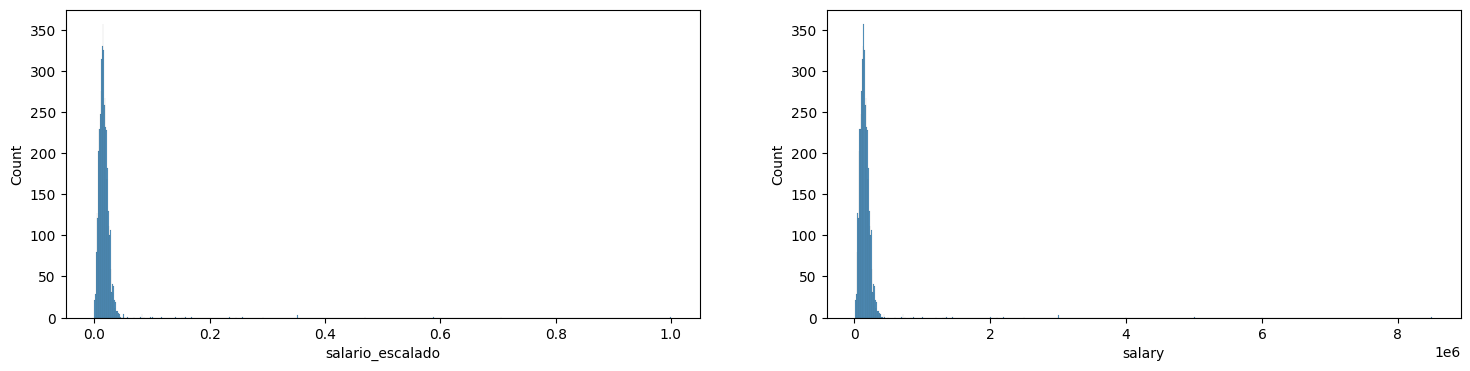

In [9]:

    
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
sns.histplot(
    data=df,
    x = "salario_escalado",  #De igual manera al escalarlo no sale un gráfico legible
    ##kde=True
)

print(f"\n Curtosis: {kurtosis(df["salario_escalado"])}")
print(f"\n Asimetría: {skew(df["salario_escalado"])}")


plt.subplot(1,2,2)
sns.histplot(
    data=df,
    x = "salary",  #De igual manera al escalarlo no sale un gráfico legible
    ##kde=True
)


- Una curtosis super alta, nos indica un pico gigante de los datos, se debe a los distintos tipos de moneda. La gran mayoria siendo dolares y concentrados en un rango en especifico, por eso el pico tan grande. Por lo mencionado anteriormente, se ve un sesgo positivo enorme. 

### Boxplot para salary (escalado y sin escalar)

<Axes: xlabel='salary'>

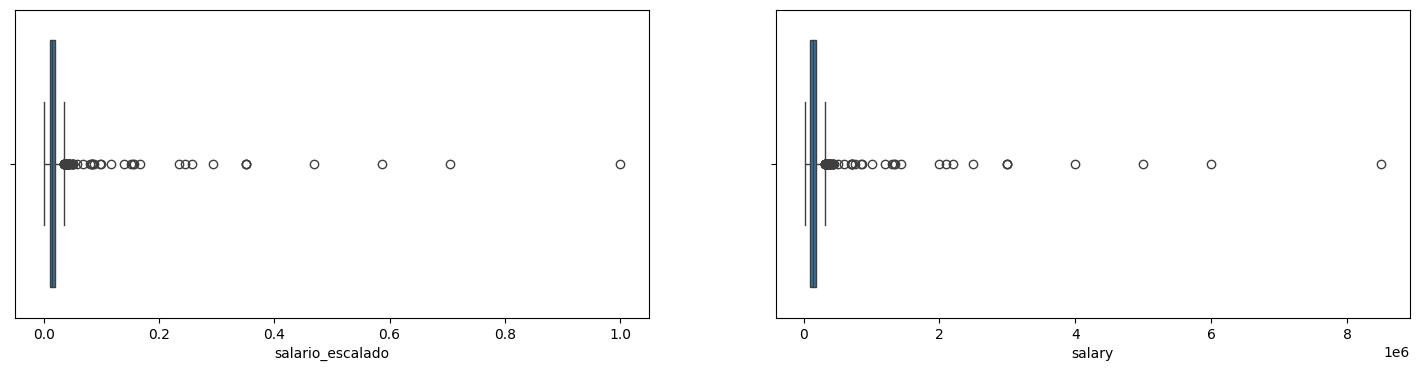

In [10]:
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)

sns.boxplot(
    data=df,
    x = "salario_escalado",
)

plt.subplot(1,2,2)
sns.boxplot(
    data=df,
    x = "salary",
)


- Misma observación que con el histograma, debido a las distintas monedas y la concentracion de salarios en dólares, se ve que la mayoria se concentra en un rango muy bajo, que en realidad no necesariamente sería un sueldo bajo, es bajo con respecto a la escala del gráfico debido a las distintas monedas

- No es lo mismo 50.000 dolares que 50.000 dolares pero en pesos o bolivares, solo por dar un ejemplo, a eso se debe el sesgo y el gráfico

### Gráficos con las monedas filtradas (USD)


 Curtosis: 6.010668651488791

 Asimetría: 1.2806301698138658


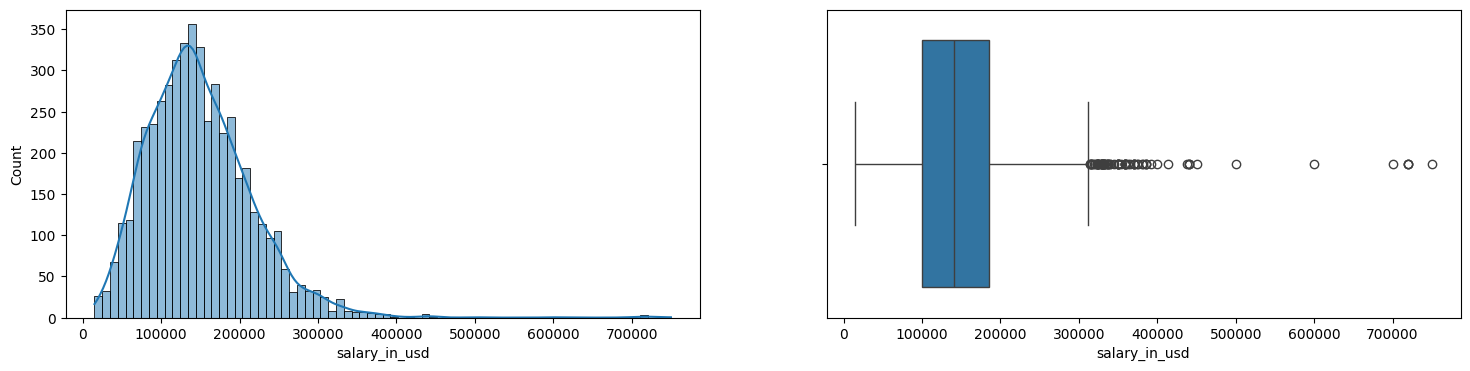

In [11]:
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)

sns.histplot(
    data=df,
    x = "salary_in_usd",
    kde=True
)

print(f"\n Curtosis: {kurtosis((df["salary_in_usd"]))}")
print(f"\n Asimetría: {skew(df["salary_in_usd"])}")

plt.subplot(1,2,2)

sns.boxplot(
    data=df,
    x = "salary_in_usd",
)

plt.show()

#### Histograma:
- Acá sí se ven resultados realistas y entendibles debido a estandarizacion en dolares
- Se ve una curtosis de 6, que indica una distribucion ligeramente cercana a la normal.  
- Una asimetría que indica un sesgo positivo
#### Boxplot:
- El 50% de los salarios rondan los 100.000 y 180.000 dolares aproximadamente
- Se ve que la mediana es aproximadamente 140.000, esto dice que la mitad de los sueldos estan por debajo de 140mil y por encima de 140mil
- Se ve una importante cantidad de outliers entre poco más de 300.000 y poco más de 700.000

### Creamos gráficos de barras para visualizar la distribución de las variables categóricas (`experience_level`, `employment_type`, `job_title`, `employee_residence`, `company_location`, `company_size`).

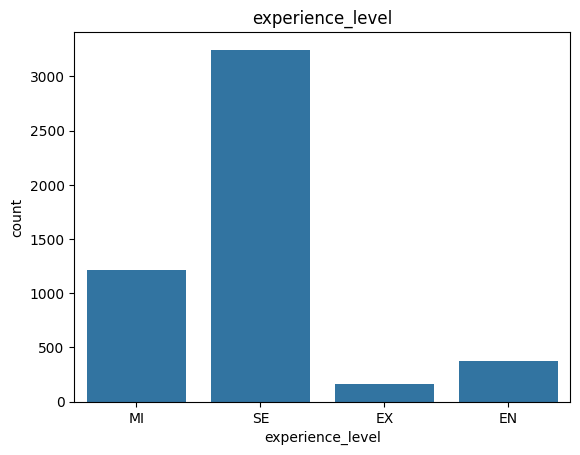

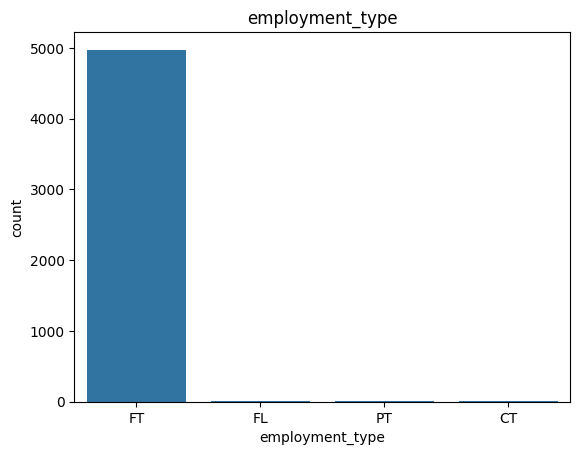

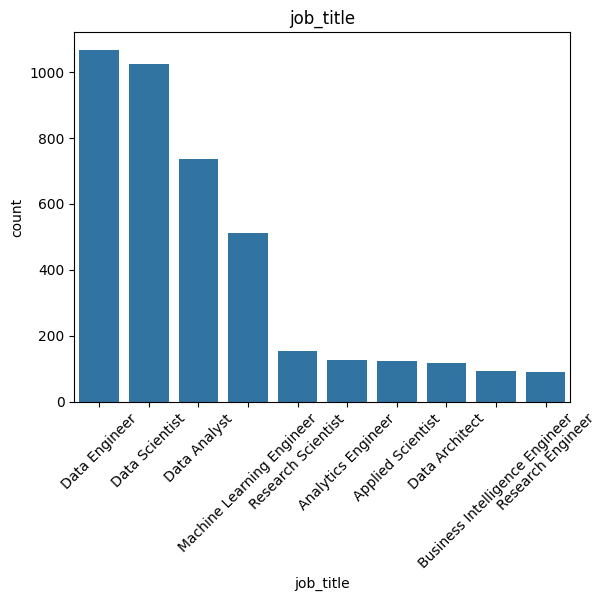

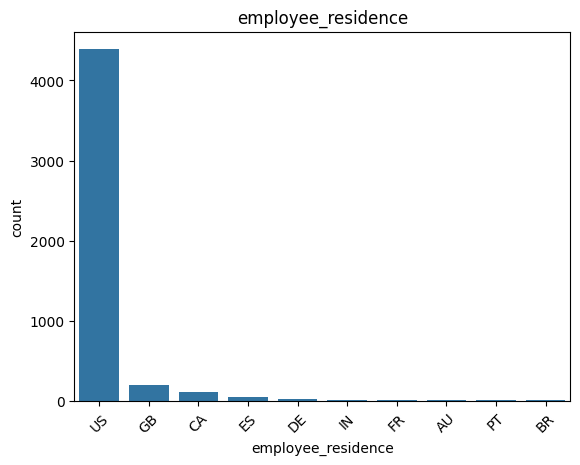

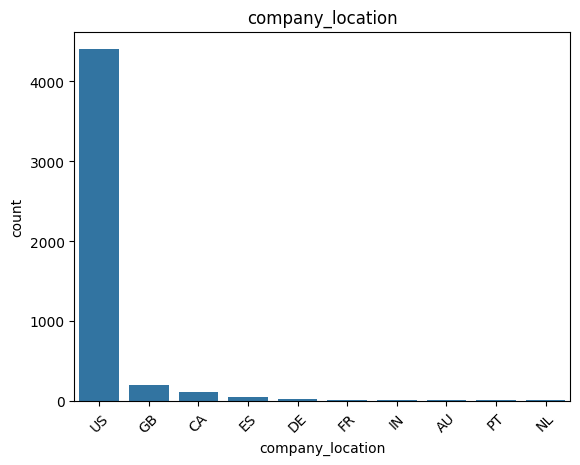

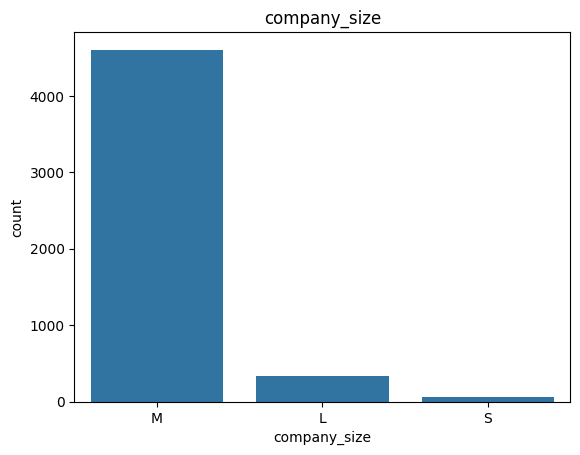

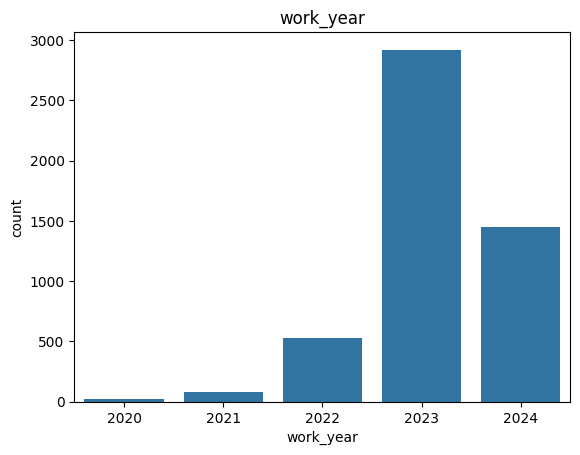

In [12]:
lista_categoricos = ["experience_level", "employment_type", "job_title", "employee_residence", "company_location", "company_size", "work_year"] #Adicionalmente agregamos work_year

for column in lista_categoricos:
    if column in ["employee_residence", "company_location", "job_title"]:
        # Contar y seleccionar solo las 10 más frecuentes ya que hay demasiadas categorías
        top_10 = df[column].value_counts().nlargest(10).index
        sns.countplot(
            data=df[df[column].isin(top_10)],
            x=column,
            order=top_10
        )
        plt.title(column)
        plt.xticks(rotation=45)
        plt.show()
    else:
        sns.countplot(
        data=df,
        x = column
        )
        plt.title(column)
        plt.show()
    

- La mayoría de salarios corresponden al 2023, un gran año para el auge de los empleos con más ganancias de nuestro dataset, como data engineer, data cientist, data analyst, etc.
- La mayoría pertenecen a los estados unidos son seniors y full time, por eso los sueldos bastantes altos y el sesgo con respecto a las demás monedas


## Normalización y Estandarización de Variables

En esta sección, aplicaremos técnicas de escalado a las variables numéricas. La **normalización** ajusta los valores a un rango entre 0 y 1, mientras que la **estandarización** transforma los datos para que tengan una media de 0 y una desviación estándar de 1.


**Instrucción:** Normaliza la variable `salary_in_usd` usando el método de escalado Min-Max. Crea una nueva columna llamada `salary_in_usd_norm` para almacenar los valores normalizados.

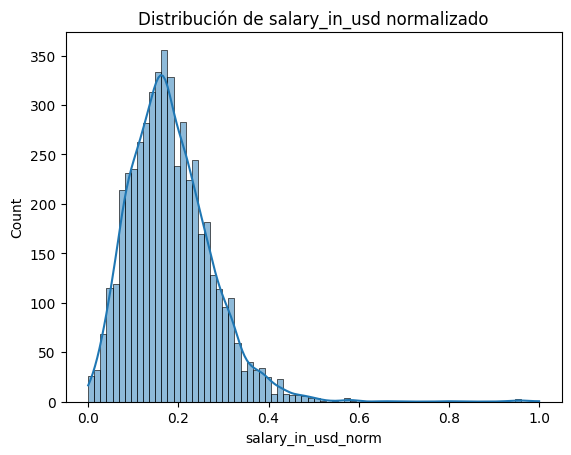

In [13]:
# -- Escribe aquí tu código para la normalización de 'salary_in_usd' --

df["salary_in_usd_norm"] = (df["salary_in_usd"] - df["salary_in_usd"].min()) / (df["salary_in_usd"].max() - df["salary_in_usd"].min())


sns.histplot(
    data=df,
    x="salary_in_usd_norm",
    kde=True
)
plt.title("Distribución de salary_in_usd normalizado")
plt.show()

- Larga cola a la derecha, sesgo positivo, presencia de outliers
- La mayoria de salarios son relativamente "bajos" pero ese sesgo influye en la distribucion
- La mayoria de salarios se encuentra en un rango bastate estrecho
- Los salarios altos son muy poco frecuentes
- Los salarios más altos son casos excepcionales, pueden ser puestos de trabajo muy especificos

 #### Estandarizamos la variable `salary_in_usd` creando una nueva columna llamada `salary_in_usd_std`. Utilizamos `StandardScaler` de `scikit-learn`.

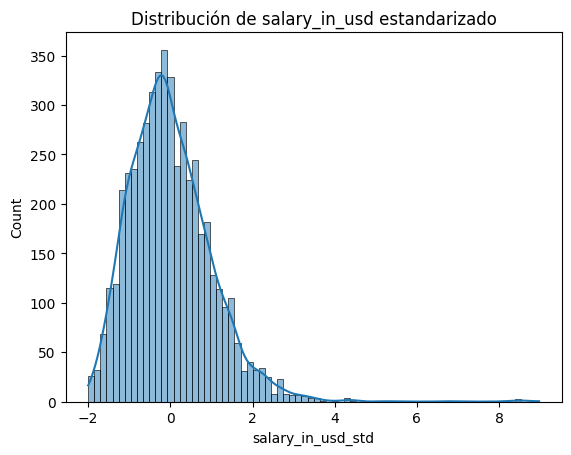

In [14]:
# -- Escribe aquí tu código para la estandarización de 'salary_in_usd' --

# INstancair el objeto StandardScaler
scaler = StandardScaler()

df["salary_in_usd_std"] = scaler.fit_transform(df[["salary_in_usd"]])


sns.histplot(
    data=df,
    x="salary_in_usd_std",
    kde=True
)
plt.title("Distribución de salary_in_usd estandarizado")
plt.show()


- Se confirma lo mencionado anteriormente, un gran sesgo positivo y outliers, se ve hasta inclusive 8 desviaciones estandar

####  Diferencias entre normalización y estandarización 

- Estandarizacion (centrar en 0): 
    - Es más útil para detectar outliers facilmente gracias al z-score
        
- Normalización (escalar entre 0 y 1):
    - Sirve para comparar datos que tienen diferentes unidades de medida o en escalas distintas
        


## Análisis de Proporciones

En esta sección, analizaremos las proporciones de las diferentes categorías dentro de las variables categóricas.


**Instrucción:** Para cada variable categórica, calcula la proporción de cada categoría y visualízala con un gráfico de barras o un gráfico circular.

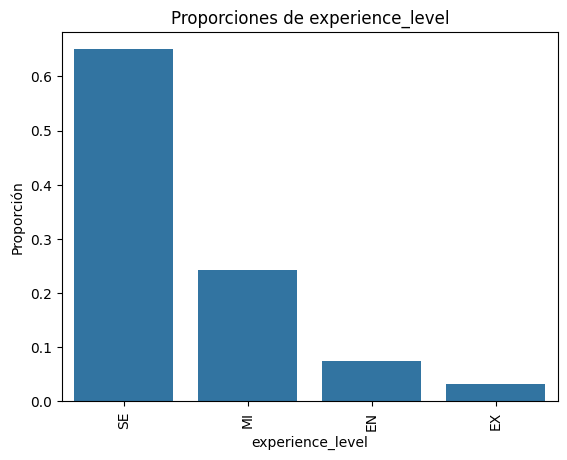

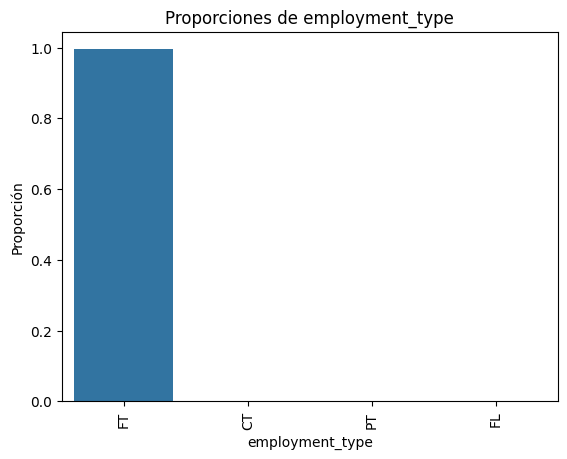

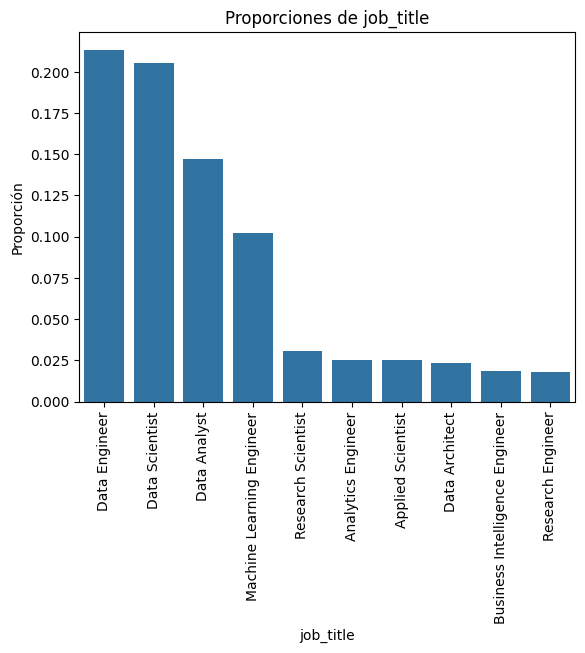

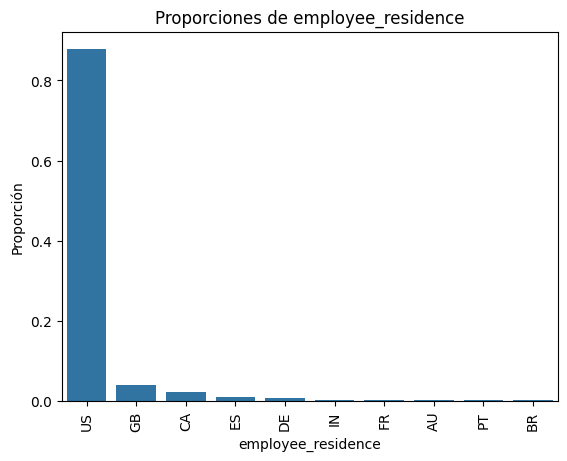

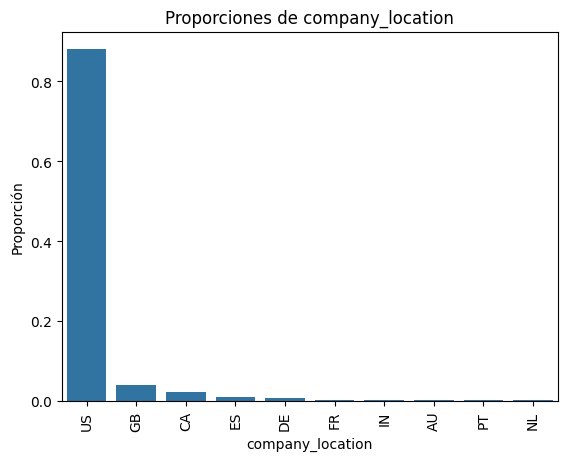

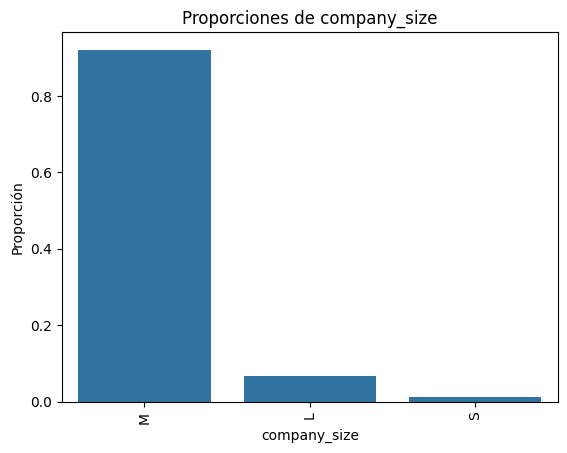

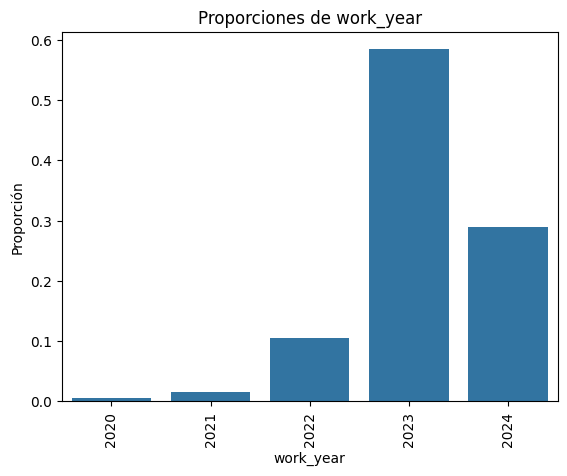

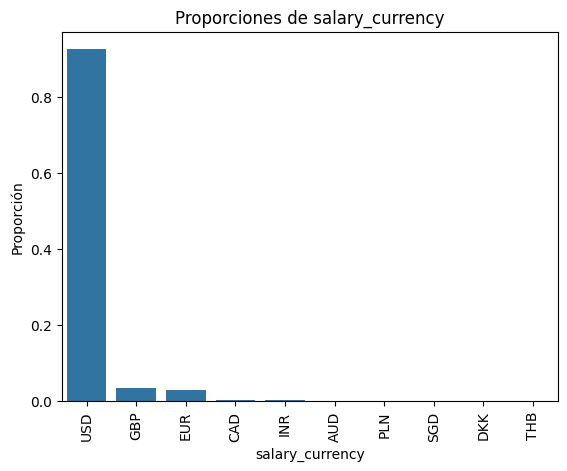

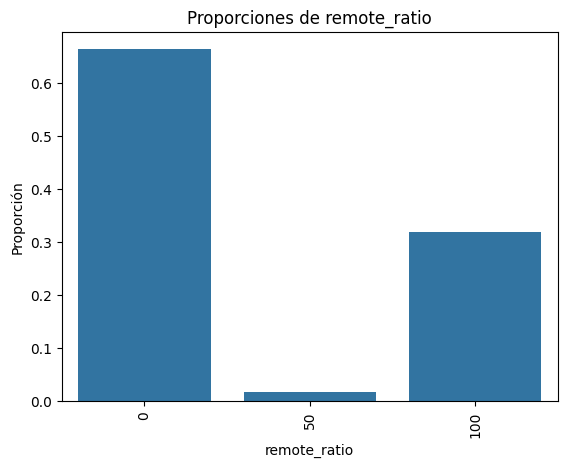

In [15]:
# -- Escribe aquí tu código para el análisis de proporciones --
#Le agregamos experience_level_num para ver posibles sesgos, ya que se puede ver sesgos si son categoricas ordinales
lista_categoricos = ["experience_level", "employment_type", "job_title", "employee_residence", "company_location", "company_size", "work_year", "salary_currency", "remote_ratio"] 


for column in lista_categoricos:
    proporciones = df[column].value_counts(normalize=True).head(10) #Pongo 10 para que no se vea tan saturado
    
    sns.barplot(
        x = proporciones.index,
        y = proporciones.values,
    ) 
    
    plt.title(f"Proporciones de {column}")
    plt.xlabel(column)
    plt.ylabel("Proporción")
    plt.xticks(rotation=90)
    plt.show()

#### experience_level:
- Se ve que más del 60% son seniors
#### employment_type:
- Aproximadamente el 90-95% de los empletos son de tiempo completo
#### job_title:
- Los 3 trabajos más presentes son data engineer, data scientist y data analyst. Estos ocupan gran porcentaje de los puestos de trabajo
#### employee_residence:
- Casi el 90% de las residencias son en estados unidos, el resto corresponde a los demás países
#### company_location:
- Al igual que las residencias de los empleados, las empresas están situadas casi en un 90% en estados unidos, le sigue el reino unido y canadá.
#### company_size:
- Casi el 90% de las empresas son medianas 

## Análisis de Correlación

En esta sección, analizaremos la correlación entre las variables numéricas del conjunto de datos.


**Instrucción:** Calcula la matriz de correlación entre las variables numéricas y visualízala con un mapa de calor (heatmap).

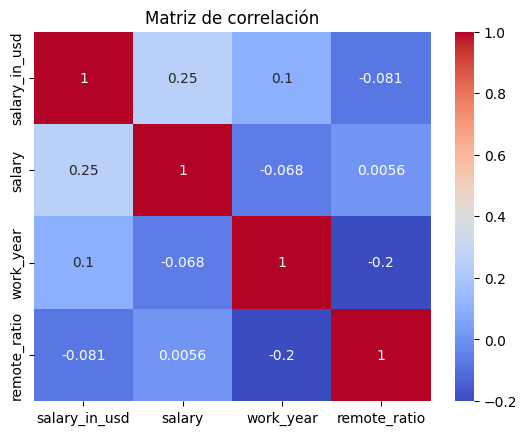

In [16]:
# -- Escribe aquí tu código para el análisis de correlación --

variables_numericas = df[["salary_in_usd", "salary", "work_year", "remote_ratio"]]

matriz_de_correlacion = variables_numericas.corr()

sns.heatmap(
    data=matriz_de_correlacion,
    annot=True, 
    cmap="coolwarm",    
)
plt.title("Matriz de correlación")
plt.show()

##### Localizamos las variables con alta correlación (positiva o negativa). 

- La unica correlación relativamente alta que identifico es la experiencia con el salario, a medida que la experiencia aumenta, tambien el salario, pero no es tan notorio o significativo
- La correlación entre dos variables nos puede ayudar para predecir qué valor podría tomar, nos da da una idea general


## Análisis de Outliers e Imputación de Outliers

En esta sección, identificaremos y trataremos los outliers en las variables numéricas.


### Utilizaremos el método del Z-score modificado (MAD) y el método del IQR para identificar outliers en las variables `salary_in_usd`. Usaremos las variables que creamos en los pasos anteriores `salary_in_usd_std` y `salary_in_usd_norm` respectivamente.


In [17]:
# -- Escribe aquí tu código para la detección de outliers --

# Añadimos a un nuevo dataframe las columnas consideradas como outliers
df_outliers = df.query("salary_in_usd_std > 3 | salary_in_usd_std < -3")


# Eliminamos los outliers del dataframe original 
df = df.query("salary_in_usd_std <= 3 & salary_in_usd_std >= -3")   #otra manera  df = df.loc[(df['salary_in_usd_std'] <= 3) & (df['salary_in_usd_std'] >= -3)]


#Vemos los datos de los outliers
df_outliers.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_escalado,salary_in_usd_norm,salary_in_usd_std
194,2024,SE,FT,Data Architect,363000,USD,363000,US,0,US,M,0.041014,0.473469,3.196126
461,2024,SE,FT,Analytics Engineer,720000,USD,720000,US,0,US,M,0.083088,0.959184,8.526100
484,2023,SE,FT,ML Engineer,365630,USD,365630,US,0,US,M,0.041324,0.477048,3.235392
619,2023,SE,FT,Data Scientist,370000,USD,370000,US,0,US,M,0.041839,0.482993,3.300635
915,2023,SE,FT,Computer Vision Engineer,351000,USD,351000,US,0,US,M,0.039599,0.457143,3.016967


In [18]:
print(f"Residencia: {df_outliers['employee_residence'].value_counts()}\n")

print(f"Tipo de empleo: {df_outliers['employment_type'].value_counts()}\n")

print(f"Moneda del salario: {df_outliers['salary_currency'].value_counts()}\n")

print(f"Ubicación de la compañia: {df_outliers['company_location'].value_counts()}\n")



Residencia: employee_residence
US    41
Name: count, dtype: int64

Tipo de empleo: employment_type
FT    41
Name: count, dtype: int64

Moneda del salario: salary_currency
USD    41
Name: count, dtype: int64

Ubicación de la compañia: company_location
US    41
Name: count, dtype: int64



- Decidí eliminar los outliers y almacenarlos otro dataframe ya que en un futuro se pueden analizar los outliers y entenderlos. Ya son muy pocos registros en comparación al total y estadisticamente representa un porcentaje insignificativo no los estudiaremos de momento.
- Todas las personas que tienen salarios extremadamente altos son residentes de estados unidos, cobran en dolares, sus empleos son de tiempo completo y la ubicacion de las compañias para la que trabajan tambien son de estados unidos

## De esta manera nos queda nuestra distribución sin los outliers:

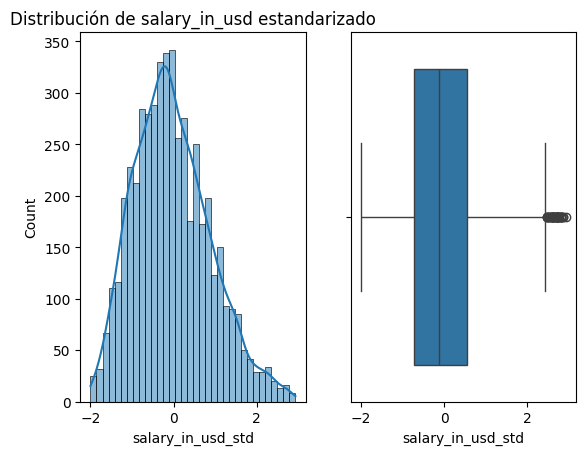

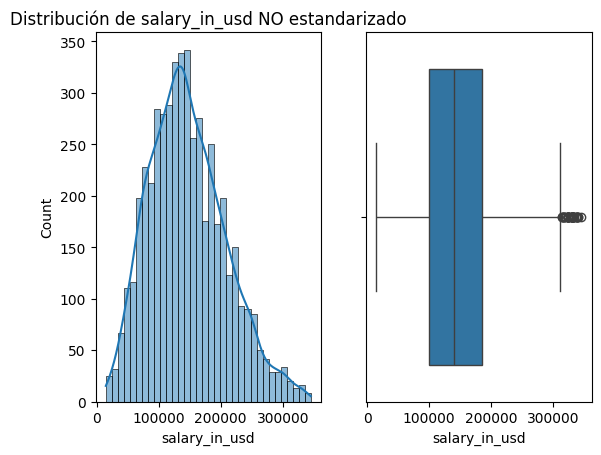

In [19]:
plt.subplot(1,2,1)
sns.histplot(
    data=df,
    x="salary_in_usd_std",
    kde=True
)
plt.title("Distribución de salary_in_usd estandarizado")

plt.subplot(1,2,2)
sns.boxplot(
    data=df,
    x="salary_in_usd_std",
)
plt.show()


plt.subplot(1,2,1)
sns.histplot(
    data=df,
    x="salary_in_usd",
    kde=True
)
plt.title("Distribución de salary_in_usd NO estandarizado")

plt.subplot(1,2,2)
sns.boxplot(
    data=df,
    x="salary_in_usd",
)
plt.show()
#Disminuyó la cantidad de outliers pero aún hay

In [20]:
# Ordenamos los datos por salario en dolares de manera descendente para localizar los registros con salarios más altos

df.sort_values("salary_in_usd", ascending=False, inplace=False).head()



,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_escalado,salary_in_usd_norm,salary_in_usd_std
4098,2023,SE,FT,Research Scientist,345000,USD,345000,US,0,US,M,0.038892,0.448980,2.927388
2210,2024,SE,FT,Machine Learning Engineer,340000,USD,340000,US,0,US,M,0.038303,0.442177,2.852738
1957,2023,MI,FT,Research Scientist,340000,USD,340000,US,100,US,M,0.038303,0.442177,2.852738
3860,2024,SE,FT,Research Scientist,337300,USD,337300,US,0,US,M,0.037985,0.438503,2.812428
4502,2024,SE,FT,Research Scientist,337300,USD,337300,US,0,US,M,0.037985,0.438503,2.812428


### OBS:
- No los consideraré como errores o valores demasiados extremos ya que están dentro del z-score permitido
- Nuevamente predominan los dolares y las residencias en estados unidos
- Son puestos de trabajo bastante prestigiosos, full time, con experiencia y de los estados unidos, por lo que no los consideraré como errores, tienen sentido.



## Análisis Estadístico

Realizaremos un análisis estadístico más profundo del conjunto de datos, incluyendo medidas de tendencia central, rangos y desviación estándar.


**Instrucción:** Calcula la media, mediana y moda de las variables `salary_in_usd`.


In [21]:
# -- Escribe aquí tu código para calcular las medidas de tendencia central --

print(f"Media de salary_in_usd: {df['salary_in_usd'].mean()}\n")

print(f"Mediana de salary_in_usd: {df['salary_in_usd'].median()}\n")

print(f"Moda de salary_in_usd: {df['salary_in_usd'].mode()[0]}\n")

Media de salary_in_usd: 146604.88929219602

Mediana de salary_in_usd: 140000.0

Moda de salary_in_usd: 150000



Calculamos el rango y la desviación estándar de la variable `salary_in_usd`


In [22]:
# -- Escribe aquí tu código para calcular el rango y la desviación estándar --
print(f"Max: {df["salary_in_usd"].max()}. Min: {df["salary_in_usd"].min()}\n")

print(f"Rango de la variale salary_in_usd: {df["salary_in_usd"].max() - df["salary_in_usd"].min()}\n")

print(f"Desviación estándar de la variable salary_in_usd: {df['salary_in_usd'].std()}\n")


Max: 345000. Min: 15000

Rango de la variale salary_in_usd: 330000

Desviación estándar de la variable salary_in_usd: 61247.29542623645



### Calculamos el promedio acumulado de la variable `salary_in_usd` por año y por experiencia

In [23]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_escalado,salary_in_usd_norm,salary_in_usd_std
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M,0.017678,0.204082,0.240006
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M,0.006482,0.074830,-1.178334
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M,0.008250,0.108087,-0.813388
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M,0.009157,0.105714,-0.839426
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M,0.015910,0.183673,0.016058


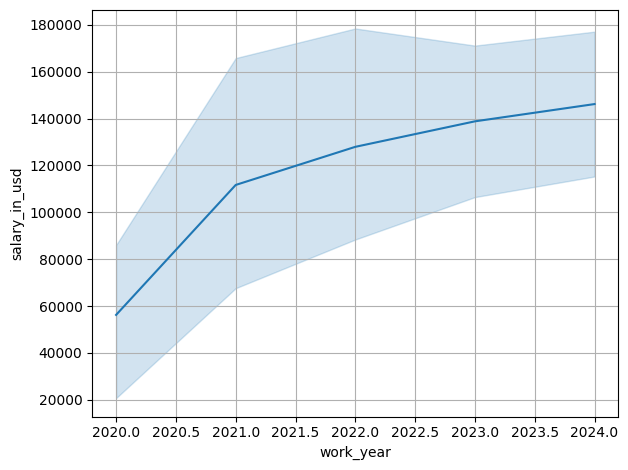

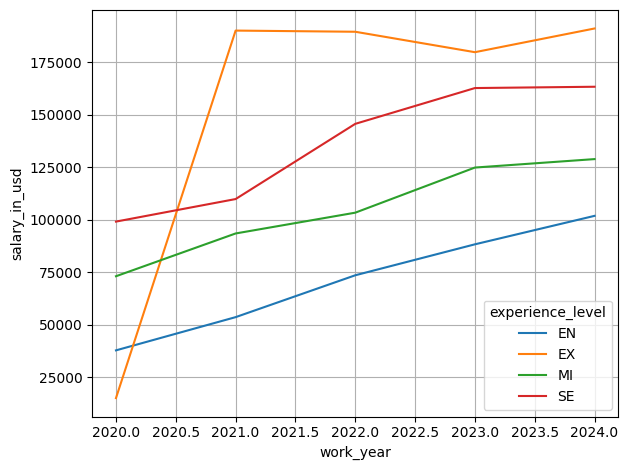

In [24]:
# Ordenamos los datos por 'work_year' para ver el progreso de los salarios a lo largo de los años
df_sorted = df.groupby(["work_year", "experience_level"])["salary_in_usd"].mean().reset_index()
df_sorted = df_sorted.sort_values("work_year")

df_sorted["cum_avg_salary_in_usd"] = df_sorted["salary_in_usd"].expanding().mean() #promedio acumulado de salarios por año


# print(f"Promedio acumulado de salary_in_usd: ")
# display(df_sorted.head())

sns.lineplot(
    x = df_sorted["work_year"],
    y = df_sorted["salary_in_usd"],
   
)
plt.tight_layout()
plt.grid()
plt.show()

sns.lineplot(
    x = df_sorted["work_year"],
    y = df_sorted["salary_in_usd"],
    hue= df_sorted["experience_level"]
   
)
plt.tight_layout()
plt.grid()
plt.show()

# sns.lineplot(
#     x = df_sorted["work_year"],
#     y = df_sorted["salary_in_usd"],
#     hue= df_sorted["experience_level"],
#     style= df_sorted["employment_type"]
# )
# plt.tight_layout()
# plt.grid()
# plt.show()

### OBS:

- Vemos principalmente que la tendencia general del mercado. A lo largo de los años han tenido una tendencia positiva, lo que indica un crecimiento sostenido del sector tecnologico 

- Se observa que la categoria "EX" tuvo su auge en el año 2020, lo más probable es la demanda de personas con mucha experiencia en el sector tecnológico debido a la pandemia y a la digitalización que hubo ese año
- Se ve claramente que la categoria "EN" tiene una tendencia positiva casi perfecta. Siempre tuvo un crecimiento estable y sostenido. Las otras categorias tambien van en costante crecimiento pero con algunas irregularidades, a veces bajan, suben o se mantienen. La tendencia casi perfecta nos podría dar entrada a algoritmos de predicción como regresiones.

## 13. Análisis con PMF, CDF y PDF

En esta sección, analizaremos las funciones de probabilidad de masa (PMF), distribución acumulada (CDF) y densidad de probabilidad (PDF) para las variables numéricas.


Calcularemos con la variable `salary_in_usd`:
- Si la variable es discreta, calculamos y graficamos la PMF.
- Si la variable es continua, graficamos la PDF usando `sns.kdeplot()`.
- Calculamos y graficamos la CDF.


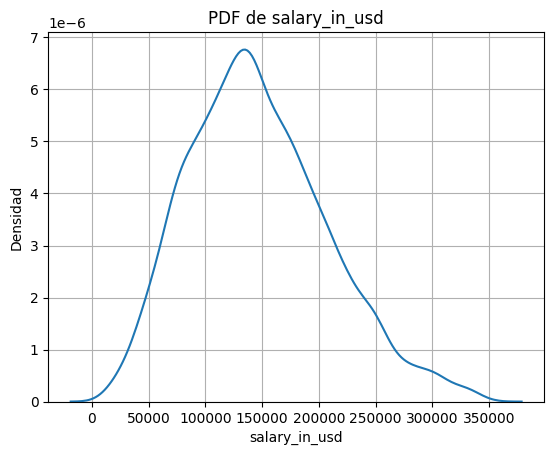

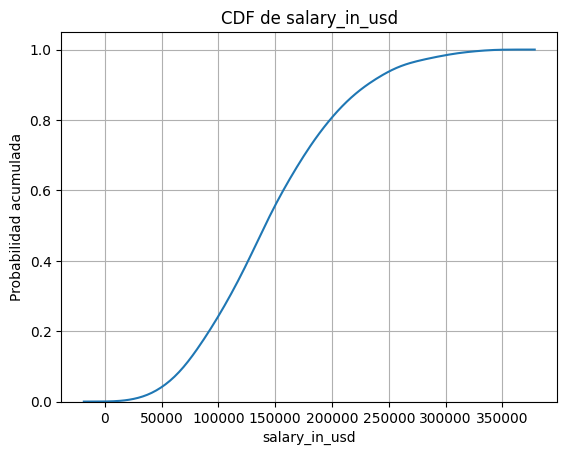

In [25]:
# En este caso no se usa PMF porque no es una variable discreta

#PDF
sns.kdeplot(
    df["salary_in_usd"],    
)
plt.title("PDF de salary_in_usd")
plt.xlabel("salary_in_usd")
plt.ylabel("Densidad")
plt.grid()
plt.show()

#CDF
sns.kdeplot(
    df["salary_in_usd"],    
    cumulative=True,
)
plt.title("CDF de salary_in_usd")
plt.xlabel("salary_in_usd")
plt.ylabel("Probabilidad acumulada")
plt.grid()
plt.show()


### OBS:
- Vemos que hay un gran pico, una densidad enorme de salarios que se encuentra entre los 100.000 y 150.000 dolares aproximadamente 

- Un 25 % gana menos de 100.000, el 50% gana entre 100.000 y 175.000 y el otro 25% más de 175.000

## Análisis Multivariado

En esta sección, realizaremos un análisis multivariado para explorar las relaciones entre las diferentes variables del conjunto de datos.


Crearemos un diagrama de dispersión para visualizar la relación entre `salary_in_usd` y `remote_ratio`. 


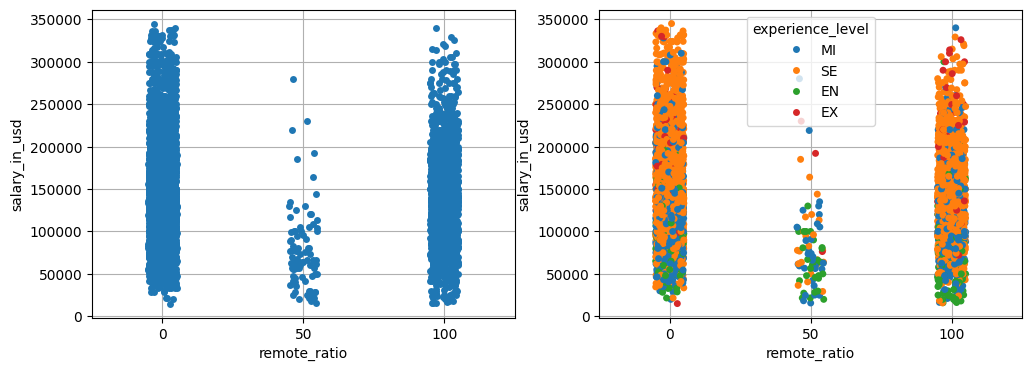

In [26]:
# -- Escribe aquí tu código para crear el diagrama de dispersión --

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.stripplot(
    data=df,
    x = "remote_ratio",
    y = "salary_in_usd"
    )
plt.grid()

plt.subplot(1,2,2)
sns.stripplot(  #usé stripplot porque se ven mejor los datos que con scatterplot cuando se agrupan
    data=df,
    x = "remote_ratio",
    y = "salary_in_usd",
    hue= "experience_level", # Adicionalmente agregamos experiencia para ver la relación
    jitter=True
)
plt.grid()
plt.show()

### OBS:
- Se observa menor precencia en la modalidad híbrida, siendo en promedio los más bajos
- Las modalidades presencial y remoto cuentan con los sueldos más altos y mayor cantidad de presencia.
- La categoría senior, son los que abarcan los sueldos más altos y en general, la mayoría de sueldos en el mercado. Como era de esperarse la categoría entry es la más baja
- Hay más seniors en trabajo presencial y remoto, en híbrido predominan los "EN"

Creaamos un gráfico de barras apiladas para visualizar la relación entre `company_size` y `experience_level`. 

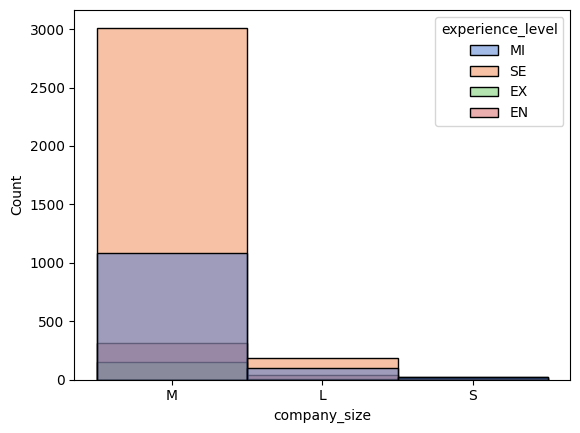

In [27]:
sns.histplot(
    data = df,
    x= "company_size",
    hue= "experience_level",
    multiple="layer",
    palette="muted"
)
plt.show()




- Se ve claramente que las empresas medianas dominan el mercado, así tambien los seniors en todas las empresas 

#### Creamos un boxplot para visualizar la relación entre `salary_in_usd` y `experience_level`. Interpreta el gráfico.


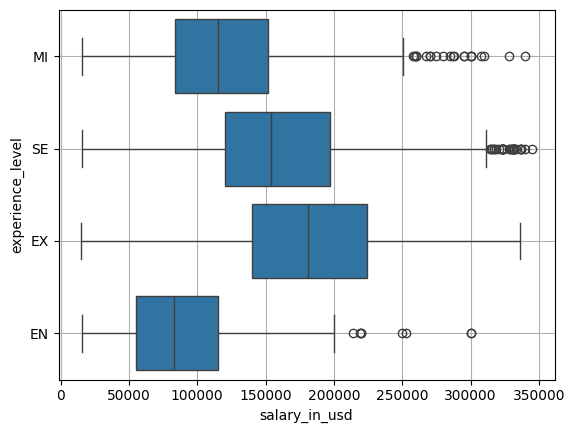

In [28]:
sns.boxplot(
    data = df,
    x = "salary_in_usd",
    y = "experience_level",
)
plt.grid()
plt.show()

- Aquí hemos identificado outliers al agruparlos por categorías. Vamos a tratarlos

In [29]:
#Funcion para identficar outliers usando el rango intercuartilico
def identificar_outliers(df_agrupado):
    Q1 = df_agrupado["salary_in_usd"].quantile(0.25)
    Q3 = df_agrupado["salary_in_usd"].quantile(0.75) #Acá calculamos los cuartiles
    
    IQR = Q3 - Q1  #rango intercuatilco
    
    limite_inferior = Q1 - 1.5 * IQR  #se establece el limite inferior y superior
    limite_superior = Q3 + 1.5 * IQR
    
    #acá devolvemos los outliers
    return df_agrupado[(df_agrupado["salary_in_usd"] < limite_inferior) | (df_agrupado["salary_in_usd"] > limite_superior)]


# esta funcion es para imputar los ouliers con la mediana
def imputar_outliers(df_agrupado):
    #display(df_agrupado) #para ver cómo funcionaba la iteración
    
    mediana = df_agrupado["salary_in_usd"].median().round(0) #redondeamos la mediana porque daba una advertencia de que no era entero
    #print(mediana) # para ver como funcionaba la iteracion
    
    outliers_identificados = identificar_outliers(df_agrupado) 
    #display(outliers_identificados)  #para ver cómo funcionaba la iteracion
    
    df_agrupado.loc[outliers_identificados.index, "salary_in_usd"] = mediana
    
    return df_agrupado

#se agrupa y llama al metodo para imputar outliers
df_sin_outliers = df.groupby("experience_level").apply(imputar_outliers).reset_index(drop=True) # drop true para que no tenga indice innecesario

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15776\1391975228.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sin_outliers = df.groupby("experience_level").apply(imputar_outliers).reset_index(drop=True) # drop true para que no tenga indice innecesario


- La advertencia solo significa que en versiones futuras de pandas, el método .groupby().apply() ya no incluirá automáticamente las columnas por las que agrupamos dentro del DataFrame que se pasa a la función. Esto no es un problema en esta versión de pandas, pero sí lo será en futuras versiones. De momento lo dejamos así.

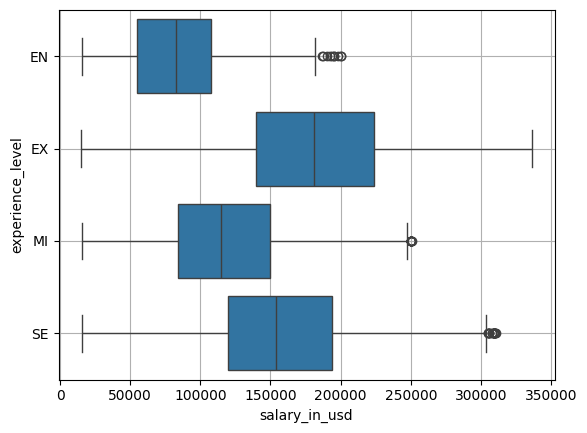

In [30]:
#Acá vemos el resultado de la imputación de los outliers con el mismo gráfico
sns.boxplot(
    data = df_sin_outliers,
    x = "salary_in_usd",
    y = "experience_level",
)
plt.grid()
plt.show()

- Acá ya disminuyeron los outliers y los podemos considerar válidos y razonables 

- En la categoría "EN", se ve un sesgo positivo, el 50% de los salarios están entre 53.000 y 105.000 aproximadamente
- En la categoría "EX", se ve un ligero sesgo negativo,  el 50% de los salarios están entre 140.000 y 225.000 aproximadamente, se ven bigotes muy largos, indica un gran rango de salarios
- En la categoróa "MI", sse ve un sesgo positivo, el 50% de los salarios están entre 80.000 y 150.000 aproximadamente.
- En la categoría "SE", se ve un muy ligero sesgo negativo, el 50% de los salarios están entre 125.000 y 280.000 aproximadamente, bigotes largos, indica un gran rango de salarios

## Prueba de Hipotesis

En esta sección, realizaremos una prueba de hipótesis para responder a una pregunta específica sobre los datos.

Imaginemos que una persona que trabaja en recursos humanos en el sector tecnológico afirma que el salario promedio en USD para los trabajos con el titulo *Data Scientist* es de al menos \$150,000.  Utilizaremos una prueba de hipótesis para determinar si hay suficiente evidencia para rechazar esta afirmación. Utilizaremos un nivel de significancia del 0.05. Antes de realizar la prueba, segmentaremos primero los datos para tener un data frame con la información unicamente de los Data Scientist.

**Pasos a seguir:**

1.  Segmentar el DataFrame para obtener solo las filas que correspondan a *Data Scientist*
2.  Formular la hipótesis nula y alternativa.
3.  Realizar una prueba t de una muestra (utiliza `ttest_1samp` de `scipy.stats`).
4.  Interpretar el valor p y tomar una decisión.



In [31]:
# Paso 1: Segmentar el DataFrame para Data Scientist
df_prueba_hipotesis = df_sin_outliers.query("job_title == 'Data Scientist'").copy() #Creamos una copia para no modificar el df original

# Paso 2: Formular las hipótesis
# H0: el salario promedio de los Data Scientists >= 150000
# H1: el salario promedio de los Data Scientists < 150000

# Paso 3: Realizar la prueba t de una muestra
t_statistic, p_value = ttest_1samp(df_prueba_hipotesis['salary_in_usd'], 150000, alternative='less')

print(f"Estadístico t: {t_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

# Paso 4: Tomar una decisión
alpha = 0.05
if p_value <= alpha:
    print("Rechazamos la hipótesis nula. Hay suficiente evidencia para afirmar que el sueldo promedio de un Data Scientist es menor a $150.000 o que NO es mayor o igual $150.000")
else:
    print("No rechazamos la hipótesis nula. No hay suficiente evidencia para afirmar que el sueldo promedio de un Data Scientist es menor a $150.000 o que sea mayor o igual a $150.000  ")   

Estadístico t: 0.0765
Valor p: 0.5305
No rechazamos la hipótesis nula. No hay suficiente evidencia para afirmar que el sueldo promedio de un Data Scientist es menor a $150.000 o que sea mayor o igual a $150.000  


- La prueba arroja que no se rechaza la hipotesis nula, no hay suficiente evidencia para afirmar que el sueldo promedio de un Data Scientist es menor a 150.000 o que es mayor o igual a 150.000. Esto no significa que el sueldo sea mayor, solo indica que no tenemos suficientes pruebas para demostrarlo, pero tampoco podemos afirmarlo, solamente faltan pruebas

## Conclusiones

En esta sección, resumiremos los hallazgos más importantes del análisis exploratorio de datos y extraeremos conclusiones sobre las características más relevantes que influyen en los salarios en la industria tecnológica.



- Los salarios analizados están estandarizados en dólares, lo que permite comparaciones claras y realistas.

- La mayoría de los empleos son full time, senior level y con residencia en EE.UU., lo que justifica los salarios elevados.

- La distribución salarial muestra:

- Alta concentración entre 100k y 150k USD.

- Mediana cercana a 140k USD.

- Presencia de outliers con salarios muy altos, principalmente en EE.UU.

- El mercado laboral tech muestra un crecimiento sostenido, especialmente en 2023.

- La experiencia tiene correlación positiva con el salario, aunque no muy fuerte.

- La categoría “EX” (executive) creció en 2020 (pandemia), y la categoría “EN” (entry level) crece de forma constante.

- Las empresas medianas y empleados senior dominan el mercado.

- Modalidades remota y presencial tienen mejores sueldos que la híbrida.

- La prueba de hipótesis para Data Scientists no arrojó evidencia suficiente para afirmar que su sueldo promedio sea menor a 150 000 USD.
